# Proyek Analisis Data: Bike-Sharing-Dataset
- **Nama:** Muhammad Rifani
- **Email:** muhammadrifani0923@gmail.com
- **ID Dicoding:** rifan_muh

## Menentukan Pertanyaan Bisnis


- Di musim apa orang-orang sering memakai sepeda dan berapa jumlah penyewaan sepeda harian dalam se musim?

- Di bulan berapa jumlah penyewaan sepeda tertinggi harian berdasarkan bulan dalam setahun?

- Di hari apa orang-orang sering menyewa sepeda dalam penyewaan sepeda harian?

- Di jam berapa orang sering memakai sepeda, tentukan penyewaan sepeda maksimal dan minimal per jam dan dicuaca seperti apa orang sering memakai sepeda?



## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

Pada tahap Gathering data, data yang peroleh dari instruksi pengerjaan proyek saya download dan melakukan upload data ke google drive untuk meload data ke dalam data frame

In [3]:
daily_df = pd.read_csv("/content/drive/MyDrive/Data-Analytics-Project/Bike-Sharing/day.csv")
daily_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv("/content/drive/MyDrive/Data-Analytics-Project/Bike-Sharing/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Sebagai permulaan, kita memeriksa tipe data data dari tiap kolom yang terdapat dalam daily_df. Proses ini dapat dilakukan menggunakan method info() seperti contoh kode berikut.

In [5]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


jika di perhatikan, jumlah data pada daily_df telah lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk dteday. kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string)

Masalah selanjutnya yang harus diperiksa ialah duplikasi data dan memeriksa parameter statistik dari kolom numerik yang terdapat dalam daily_df. Untuk mempermudah pemeriksaan, dapat menggunakan method describe(). Untuk memeriksa hal ini, kita bisa menjalankan kode berikut.

In [6]:
print("Jumlah duplikasi: ",daily_df.duplicated().sum())
daily_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


selanjutnya, hal yang sama saya lakukan pada data hours_df adalah memeriksa kembali seperti halnya daily_df. dan terdapat kesalahan tipe data yang sama pada dteday.

In [8]:
print("Jumlah duplikasi: ",hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


pada hours_df tidak terdapat duplikasi data, selanjutnya kita melakukan pembersihan data.

### Cleaning Data

Berdasarkan proses assessing data sebelumnya, diketahui bahwa terdapat kesalahan tipe data untuk kolom dteday

Untuk mengatasi masalah ini, kita akan mengganti tipe data pada kolom dteday menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh library pandas. Berikut merupakan contoh kode untuk melakukannya.

In [9]:
daily_df['dteday'] = pd.to_datetime(daily_df['dteday'])

In [10]:
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [11]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

disini saya mengganti beberapa nama kolom agar lebih mudah untuk di baca dan dimengerti, juga agar mudah untuk di idetifikasi dari dua data yang ada.

In [13]:
daily_df.rename(columns={"dteday": "date", "mnth": "month", "yr": "year", "cnt": "total"}, inplace=True)

In [14]:
hours_df.rename(columns={"dteday": "date", "mnth": "month", "yr": "year", "cnt": "total", "hr": "hour"}, inplace=True)

 selain itu saya juga mengganti nilai setiap kolom agar mudah di mengerti oleh pembaca dengan function parameter to_replace digunakan untuk menentukan nilai yang ingin di ganti. berikut daftar kolom dan nilai yang diganti

 1. season  ==>  season **(1:springer, 2:summer, 3:fall, 4:winter)**
 2. yr ==> year **(0: 2011, 1:2012)**
 3. weekday ==> **(0: sunday, 1:monday, 2:tuesday, 3:wednesday, 4:thursday, 5:friday, 6:saturday)**

In [15]:
daily_df['season'] = daily_df['season'].replace(to_replace={1: "springer", 2: "summer", 3: "fall", 4: "winter"})

In [16]:
hours_df['season'] = hours_df['season'].replace(to_replace={1: "springer", 2: "summer", 3: "fall", 4: "winter"})

In [17]:
daily_df['year'] = daily_df['year'].replace(to_replace={0: 2011, 1: 2012})

In [18]:
hours_df['year'] = hours_df['year'].replace(to_replace={0: 2011, 1: 2012})

In [19]:
daily_df['weekday'] = daily_df['weekday'].replace(to_replace={0:"sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5:"friday", 6:"saturday"})

In [20]:
hours_df['weekday'] = hours_df['weekday'].replace(to_replace={0:"sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5:"friday", 6:"saturday"})

untuk kolom weathersit yang awalnya seperti ini, sebagai berikut:

weathersit:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

saya ganti untuk lebih mempermudah menjadi, sebagi berikut:
1. Sunny weather
2. Foggy weather
3. Rainy weather
4. Poor weather


In [21]:
hours_df['weathersit'] = hours_df['weathersit'].replace(to_replace={1: "Sunny weather", 2: "Foggy weather", 3: "Rainy weather ", 4: "Poor weather"})

In [22]:
daily_df['weathersit'] = daily_df['weathersit'].replace(to_replace={1: "Sunny weather", 2: "Foggy weather", 3: "Rainy weather"})

di kolom working day awal nya seperti ini:

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

untuk memudahkan mengidentifikasinya saya merubah nilai 1 dan 0 menjadi working dan holiday untuk lebih mudah di identifikasi, dan menghapus kolom holiday dari dua data tersebut karena sudah termasuk ke dalam kolom working day.

In [23]:
hours_df['workingday'] = hours_df['workingday'].replace(to_replace={0: "holiday", 1: "working"})

In [24]:
daily_df['workingday'] = daily_df['workingday'].replace(to_replace={0: "holiday", 1: "working"})

disini saya menggunakan fungsi .drop() untuk menghapus kolom.

In [25]:
daily_df.drop('holiday', axis=1, inplace=True)

In [26]:
hours_df.drop('holiday', axis=1, inplace=True)

In [27]:
hours_df.head()

,instant,date,season,year,month,hour,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,springer,2011,1,0,saturday,holiday,Sunny weather,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,saturday,holiday,Sunny weather,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,saturday,holiday,Sunny weather,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,saturday,holiday,Sunny weather,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,saturday,holiday,Sunny weather,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
daily_df.head()

,instant,date,season,year,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
0,1,2011-01-01,springer,2011,1,saturday,holiday,Foggy weather,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,sunday,holiday,Foggy weather,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,monday,working,Sunny weather,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,tuesday,working,Sunny weather,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,wednesday,working,Sunny weather,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Oke kita dapat melihat data yang sudah kita proses tadi lebih mudah di identifikasi setelah kita perjelas dan kita ganti nilai dari setiap kolom dari dataset sebelumnya. tahap selanjutnya Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

### Explore Data daily_df

In [29]:
daily_df.describe(include="all")

<ipython-input-29-e29e1a6df4d7>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  daily_df.describe(include="all")


,instant,date,season,year,month,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,731.000000,731,731,731.000000,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,NaN,saturday,working,Sunny weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,6.519836,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,1.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,4.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


disini saya membuat sebuah pivot table untuk mengetahui dimusim apa orang suka memakai sepeda

In [30]:
daily_df.groupby(by=['season', 'weekday']).agg({

    'total': 'sum'

})

total
season   weekday          
fall     friday     155267
         monday     146307
         saturday   150794
         sunday     138431
         thursday   159561
         tuesday    152715
         wednesday  158054
springer friday      74264
         monday      63771
         saturday    65673
         sunday      60195
         thursday    72355
         tuesday     69813
         wednesday   65277
summer   friday     135792
         monday     123255
         saturday   138689
         sunday     129650
         thursday   135207
         tuesday    125449
         wednesday  130547
winter   friday     122467
         monday     122170
         saturday   122651
         sunday     115751
         thursday   118272
         tuesday    121132
         wednesday  119170

lanjut, disini saya juga membuat pivot table berdasarkan tahun dan bualn penyewaan sepeda.

In [31]:
daily_df.groupby(by=['year', 'month']).agg({

    'total': 'sum'

})

total
year month        
2011 1       38189
     2       48215
     3       64045
     4       94870
     5      135821
     6      143512
     7      141341
     8      136691
     9      127418
     10     123511
     11     102167
     12      87323
2012 1       96744
     2      103137
     3      164875
     4      174224
     5      195865
     6      202830
     7      203607
     8      214503
     9      218573
     10     198841
     11     152664
     12     123713

hal yang sama saya lakukan pada penyewaan haria sepeda, disini saya mengecek di hari apa orang sering memakai sepeda dalam setahun.

In [32]:
daily_df.groupby(by=['workingday', 'year']).agg({

    'total': 'sum'

})

total
workingday year         
holiday    2011   386839
           2012   613430
working    2011   856264
           2012  1436146

### Explore Data hours_df

In [33]:
hours_df.describe(include="all")

<ipython-input-33-858ac58eec97>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hours_df.describe(include="all")


,instant,date,season,year,month,hour,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total
count,17379.0000,17379,17379,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,NaN,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,fall,NaN,NaN,NaN,saturday,working,Sunny weather,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,NaN,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,6.537775,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,3.438776,6.914405,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,1.000000,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,4.000000,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Terakhir, saya membuat pivot table untuk mengetahui di jam berapa orang sering memakai sepeda dan di cuaca seperti apa orang sering memakainya.

In [34]:
hours_df.groupby(by=['weathersit', 'hour']).agg({

    'total': ['sum', 'max', 'min'],

})

total         
                       sum  max min
weathersit    hour                 
Foggy weather 0       8738  283   3
              1       6362  168   1
              2       4614  122   1
              3       2341   79   1
              4       1230   26   1
...                    ...  ...  ..
Sunny weather 19    171073  743  16
              20    127332  567  22
              21     95842  584  19
              22     72584  502   9
              23     46239  256   6

[75 rows x 3 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di musim apa orang-orang sering memakai sepeda dan berapa jumlah penyewaan sepeda harian dalam se musim?


<ipython-input-35-aabe2a43e7a4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


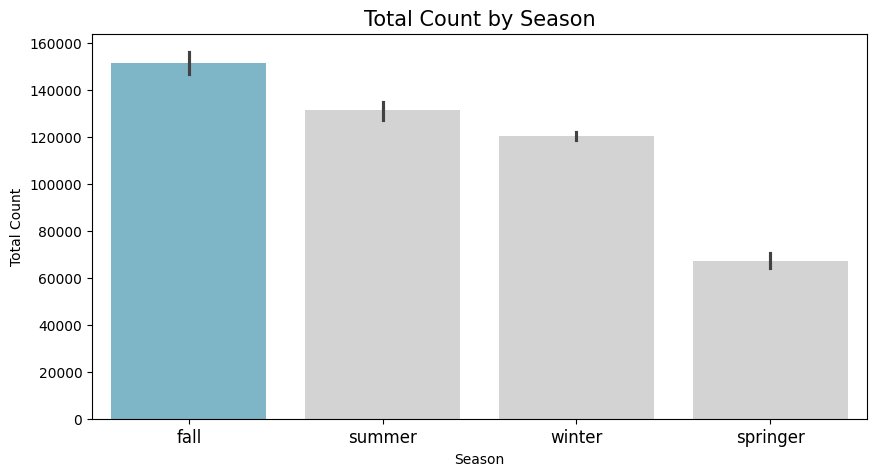

In [35]:
byseason_df = daily_df.groupby(by=['season', 'weekday']).agg({

    'total': 'sum'

})
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="total",
    x="season",
    data=byseason_df.sort_values(by="total", ascending=False),
    palette=colors
)

plt.title("Total Count by Season", loc="center", fontsize=15)
plt.ylabel("Total Count")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()


Dari grafik di atas, saya menggunakan bar plot untuk mengetahui di musim apa orang sering memakai sepeda, dan dari grafik menunjukan bahwa orang-orang lebih suka di musim gugur atau Fall.

### Pertanyaan 2: Di bulan berapa jumlah penyewaan sepeda tertinggi harian berdasarkan bulan dalam setahun?



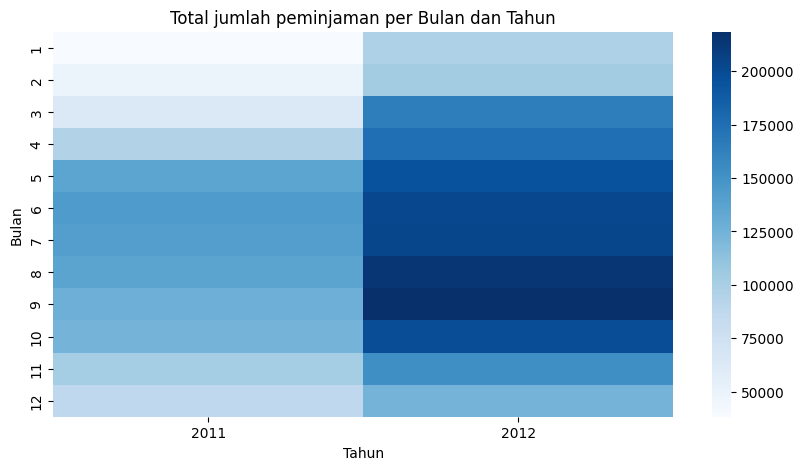

In [36]:

monthly_totals = daily_df.groupby(by=['year', 'month']).agg({'total': 'sum'})

# Buat heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(monthly_totals.pivot_table(index='month', columns='year', values='total'), cmap='Blues')
plt.xlabel('Tahun')
plt.ylabel('Bulan')
plt.title('Total jumlah peminjaman per Bulan dan Tahun')
plt.show()


Dari grafik ini terlihat semakin terang warna pada bulan menandakan semakin sedikit orang meminjam sepeda dan sebaliknya semakin gelap warna pada grafik tersebut maka semakin banyak orang penyewaannya.

### Pertanyaan 3: Di hari apa orang-orang sering menyewa sepeda dalam penyewaan sepeda harian?

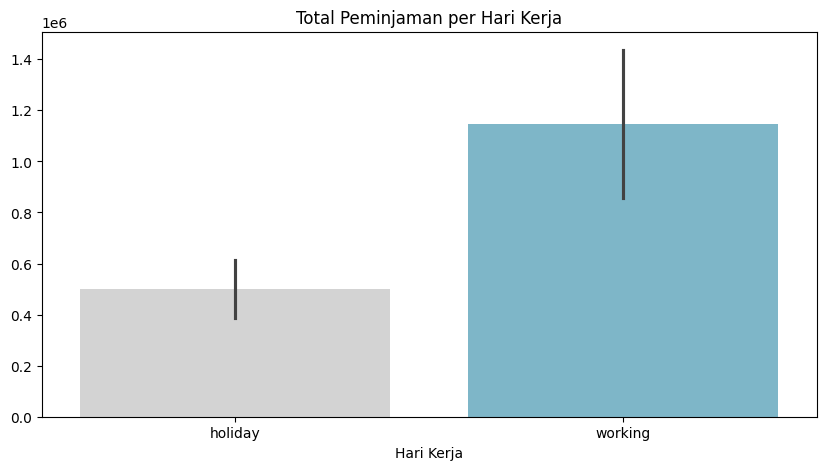

In [37]:
daily_totals = daily_df.groupby(by=['workingday', 'year']).agg({'total': 'sum'})

# Buat grafik batang
plt.figure(figsize=(10, 5))
colors = ["#D3D3D3", "#72BCD4"]
sns.barplot(daily_totals.pivot_table(index='year', columns='workingday', values='total'), palette=colors)

plt.xlabel('Hari Kerja')
plt.ylabel(None)
plt.title('Total Peminjaman per Hari Kerja')
plt.show()

dalam grafik kita melihat bahwa orang lebih memakai sepeda pada hari kerja dari pada hari libur.

### Pertanyaan 4: Di jam berapa orang sering memakai sepeda, tentukan penyewaan sepeda maksimal dan minimal per jam dan dicuaca seperti apa orang sering memakai sepeda?

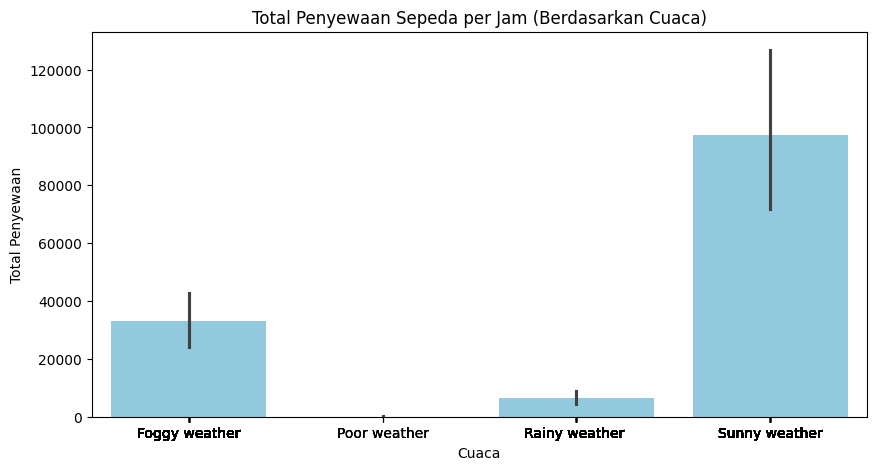

In [38]:
weather_hour_totals = hours_df.groupby(by=['weathersit', 'hour']).agg({

    'total': ['sum', 'max', 'min'],

})

# Buat grafik batang untuk total penyewaan
plt.figure(figsize=(10, 5))
sns.barplot(x=weather_hour_totals.index.get_level_values('weathersit'), y=weather_hour_totals['total']['sum'], color='skyblue')

plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan')
plt.title('Total Penyewaan Sepeda per Jam (Berdasarkan Cuaca)')
plt.xticks(weather_hour_totals.index.get_level_values('weathersit'))
plt.show()



dalam grafik terlihat orang-orang sering memakai sepeda pada cuaca cerah.

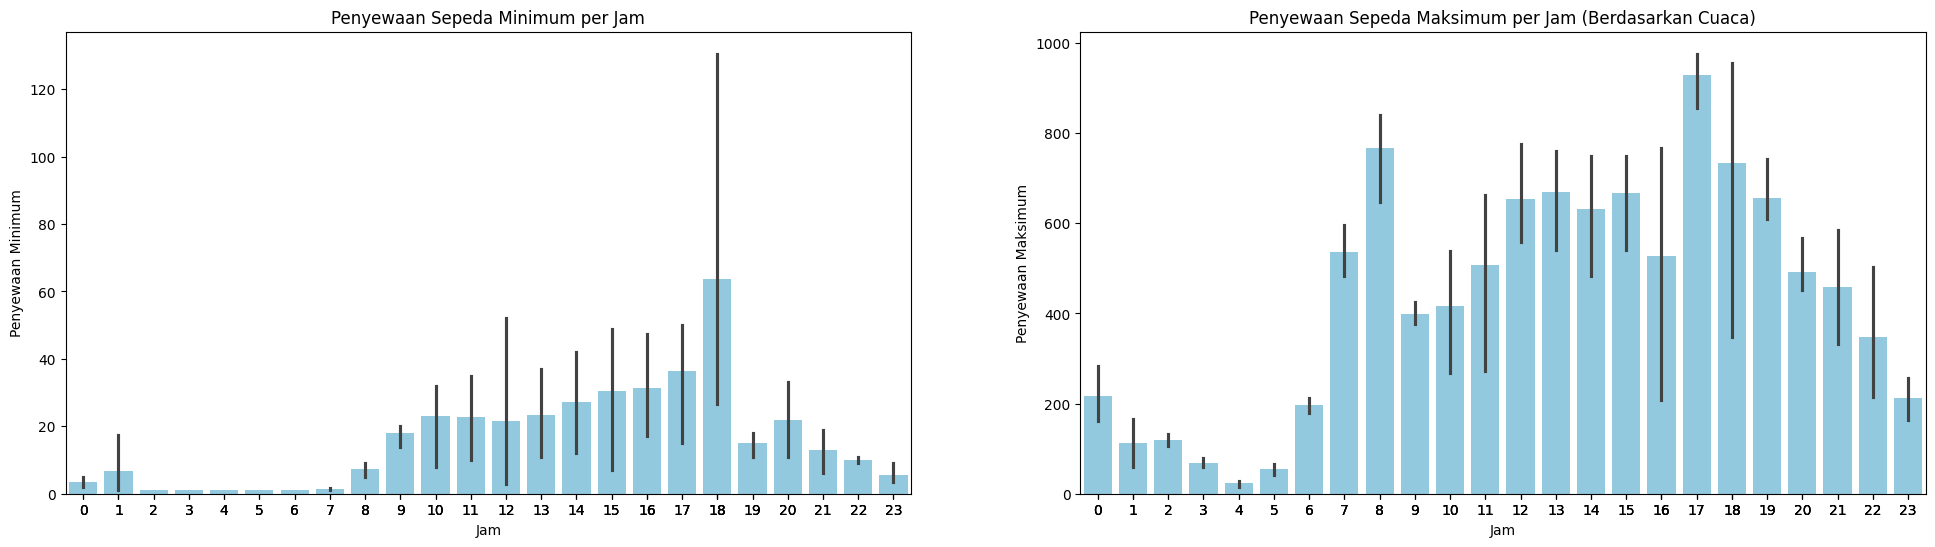

In [39]:
# Buat grafik batang untuk minimum penyewaan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x=weather_hour_totals.index.get_level_values('hour'), y=weather_hour_totals['total']['min'], ax=ax[0], color='skyblue')
ax[0].set_xlabel('Jam')
ax[0].set_ylabel('Penyewaan Minimum')
ax[0].set_title('Penyewaan Sepeda Minimum per Jam')
ax[0].set_xticks(weather_hour_totals.index.get_level_values('hour'))

# Buat grafik batang untuk maksimum penyewaan
sns.barplot(x=weather_hour_totals.index.get_level_values('hour'), y=weather_hour_totals['total']['max'], ax=ax[1], color='skyblue')
ax[1].set_xlabel('Jam')
ax[1].set_ylabel('Penyewaan Maksimum')
ax[1].set_title('Penyewaan Sepeda Maksimum per Jam (Berdasarkan Cuaca)')
ax[1].set_xticks(weather_hour_totals.index.get_level_values('hour'))

plt.show()

Dari grafik tersebut orang sering memakai sepeda pada jam 17 PM dan itu menjadi pemakaian maksimal dan orang-orang jarang memakai sepeda pada jam 2-7 AM dan itu menjadi pemakaian minimal penyewaan sepeda.

## Conclusion

- Conclution pertanyaan 1
  - Dari pertanyaan satu dapat disimpulkan melaui grafik bahwa banyak orang memakai sepeda pada musim gugur atau fall, dengan jumlah 140ribu orang memakai sepeda dari total keseluruhan.

- Conclution pertanyaan 2
  - Dari grafik pada tahun 2011 tepat pada bulan 6 dan 7 atau (juni dan juli) orang-orang banyak menggunakan sepeda. untuk di tahun 2012 terdapat pada bulan 8 dan 9 atau (agustus dan september).

- Conclution pertanyaan 3
  - Dari grafik kita bisa melihat bahwa orang-orang sering memakai sepeda pada hari kerja atau working day yaitu senin, selasa, rabu, kamis dan jum'at.

- Conclution pertanyaan 4
  - Dari grafik kita bisa menyimpulkan jam penyewaan paling banyak atau maksimal terjadi di jam 17 PM, sedangkan penyewaan paling sedikit atau minimal terjadi pada jam 2-7 AM. dan yang terakhir orang-orang cenderung bersepeda paling banyak dengan cuaca cerah atau sunny weather.

In [40]:
daily_df.to_csv("daily_data.csv", index=False)

In [41]:
hours_df.to_csv("hours_data.csv", index=False)